In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import cartopy.crs as ccrs
from tqdm import tqdm

In [3]:
dayFreq=2*np.pi/1
yearFreq=2*np.pi/365
t=91.25+0.25
inclination=24/180*np.pi

In [4]:
class Illumination():
    def __init__(self,day=1,year=365,inclination=0):
        self.dayFreq=2*np.pi/day
        self.yearFreq=2*np.pi/year
        self.inclination=inclination
    def light(self,lon,lat,t):
        lon3d,lat3d,t3d=np.meshgrid(lon,lat,t)
        normal=np.array([np.cos(lat3d)*np.cos(lon3d),np.cos(lat3d)*np.sin(lon3d),np.sin(lat3d)])
        u=np.array([-np.cos(self.yearFreq*t3d)*np.cos(self.dayFreq*t3d)-np.sin(self.yearFreq*t3d)*np.sin(self.dayFreq*t3d)*np.cos(self.inclination),
            +np.cos(self.yearFreq*t3d)*np.sin(self.dayFreq*t3d)-np.sin(self.yearFreq*t3d)*np.cos(self.dayFreq*t3d)*np.cos(self.inclination),
            -np.sin(self.yearFreq*t3d)*np.sin(self.inclination)])
        lightMap=-(u[0]*normal[0]+u[1]*normal[1]+u[2]*normal[2])
        lightMap=np.maximum(0,lightMap)
        return lightMap

In [21]:
lat=np.linspace(-np.pi/2,np.pi/2)
lon=np.linspace(0,2*np.pi)
time=np.arange(0,365,0.1)
light=Illumination(year=365,inclination=24/180*np.pi*0).light(lon,lat,time)
light=np.trapz(light,time,axis=-1)/(time[-1]-time[0])

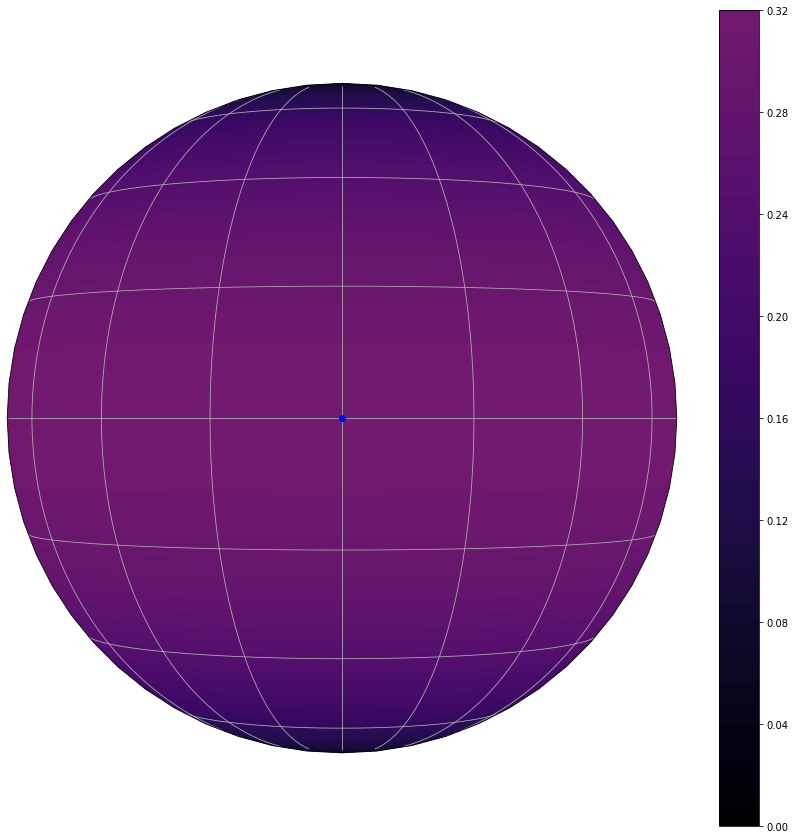

In [22]:
fig=plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.NearsidePerspective())

im=ax.contourf(lon/np.pi*180,lat/np.pi*180,light,transform=ccrs.PlateCarree(),levels=50,cmap="inferno",vmin=0,vmax=1)
#ax.contour(lon/np.pi*180,lat/np.pi*180,light,transform=ccrs.PlateCarree(),levels=10)
ax.gridlines()
ax.set_global()
ax.plot([0],[0],"ro",transform=ccrs.PlateCarree())
ax.plot([90],[0],"bo",transform=ccrs.PlateCarree())
fig.colorbar(im)
plt.show()

(-273.15, 43.41302906164458)

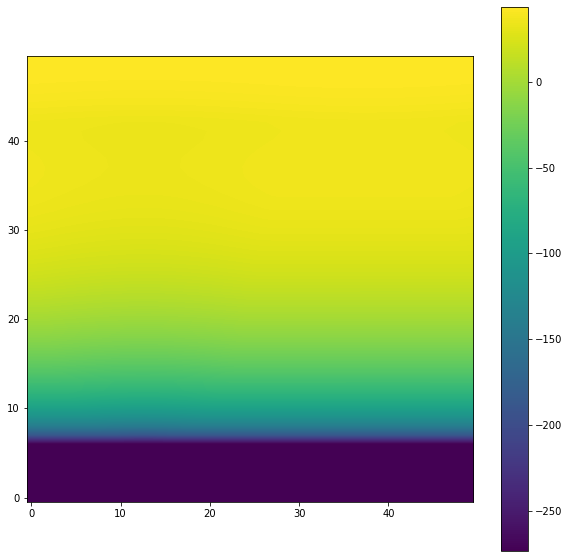

In [271]:
P=light*1400
sigma=5.67e-8
T=(P/sigma)**(1/4)
plt.figure(figsize=(10,10))
plt.imshow(T-273.15,interpolation="bilinear",origin="lower")
plt.colorbar()
np.min(T-273.15),np.max(T-273.15)

In [248]:
1369*.3

410.7